In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec, ticker

In [81]:
df = pd.read_csv("../data/processed_data/1_data_clearing/1_clearing_cars.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3954 entries, 0 to 3953
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   model_auta       3954 non-null   object
 1   cena             3954 non-null   int64 
 2   rok              3954 non-null   int64 
 3   najezd           3954 non-null   int64 
 4   stav             3954 non-null   object
 5   vykon            3954 non-null   int64 
 6   objem_motoru     3954 non-null   int64 
 7   typ_paliva       3954 non-null   object
 8   typ_prevodovky   3954 non-null   object
 9   typ_karoserie    3954 non-null   object
 10  barva_exterieru  3890 non-null   object
 11  metaliza         3890 non-null   object
 12  kraj             3924 non-null   object
dtypes: int64(5), object(8)
memory usage: 401.7+ KB
None


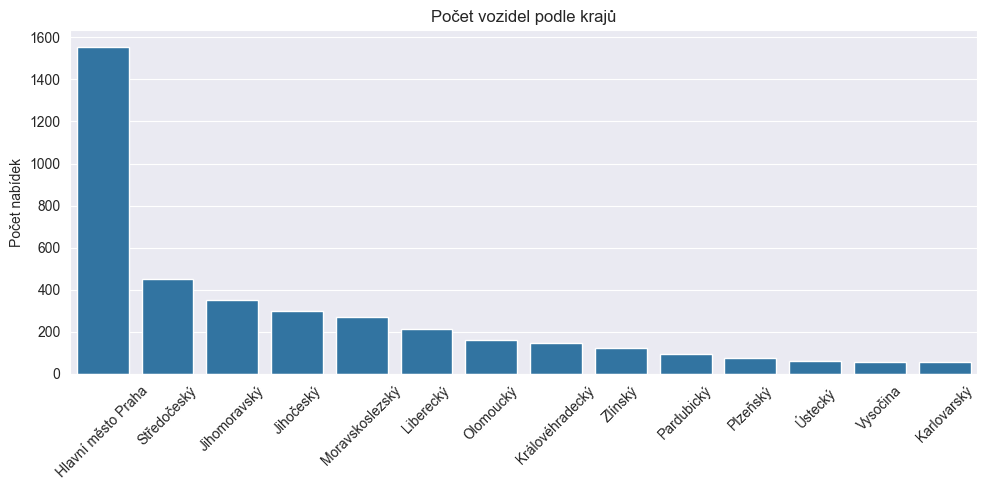

In [82]:
# Tady budou počty nabídek podle krajů
poradi_kraju = df['kraj'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='kraj', order=poradi_kraju)
plt.xticks(rotation=45)
plt.title("Počet vozidel podle krajů")
plt.ylabel("Počet nabídek")
plt.xlabel("")
plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/countplot_kraj.png")

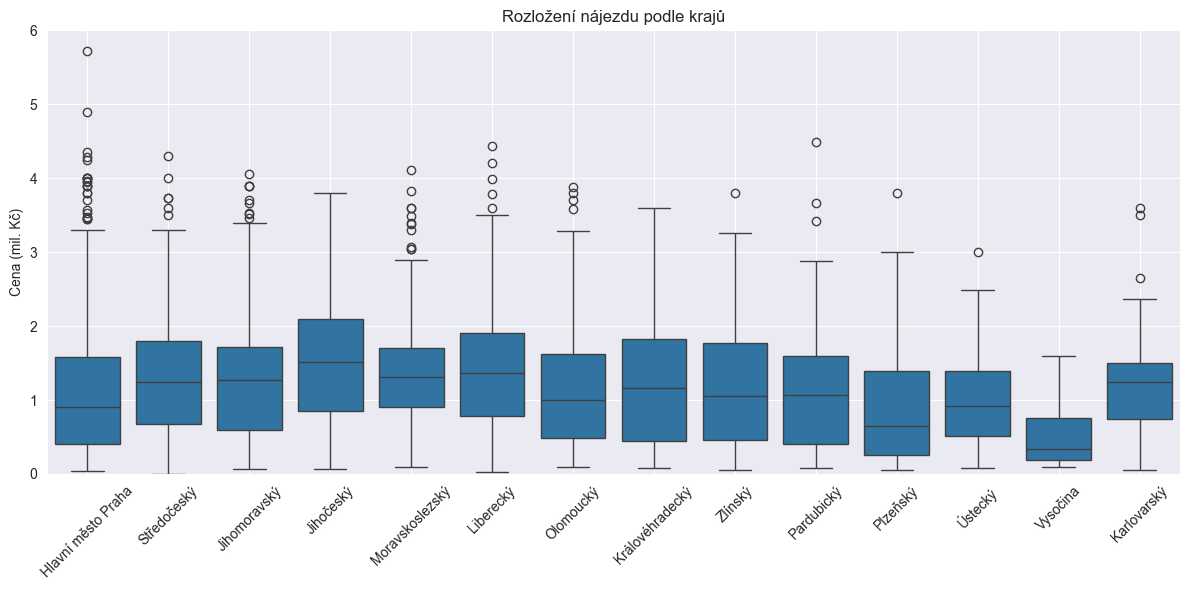

In [83]:
# Najezd podle stavu
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="kraj", y= (df["cena"] / 1000000), order=poradi_kraju)
plt.title("Rozložení nájezdu podle krajů")
plt.xticks(rotation=45)
plt.ylim(0, 6)
plt.ylabel("Cena (mil. Kč)")
plt.xlabel("")
plt.grid(True)
plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/boxplot_kraj.png")

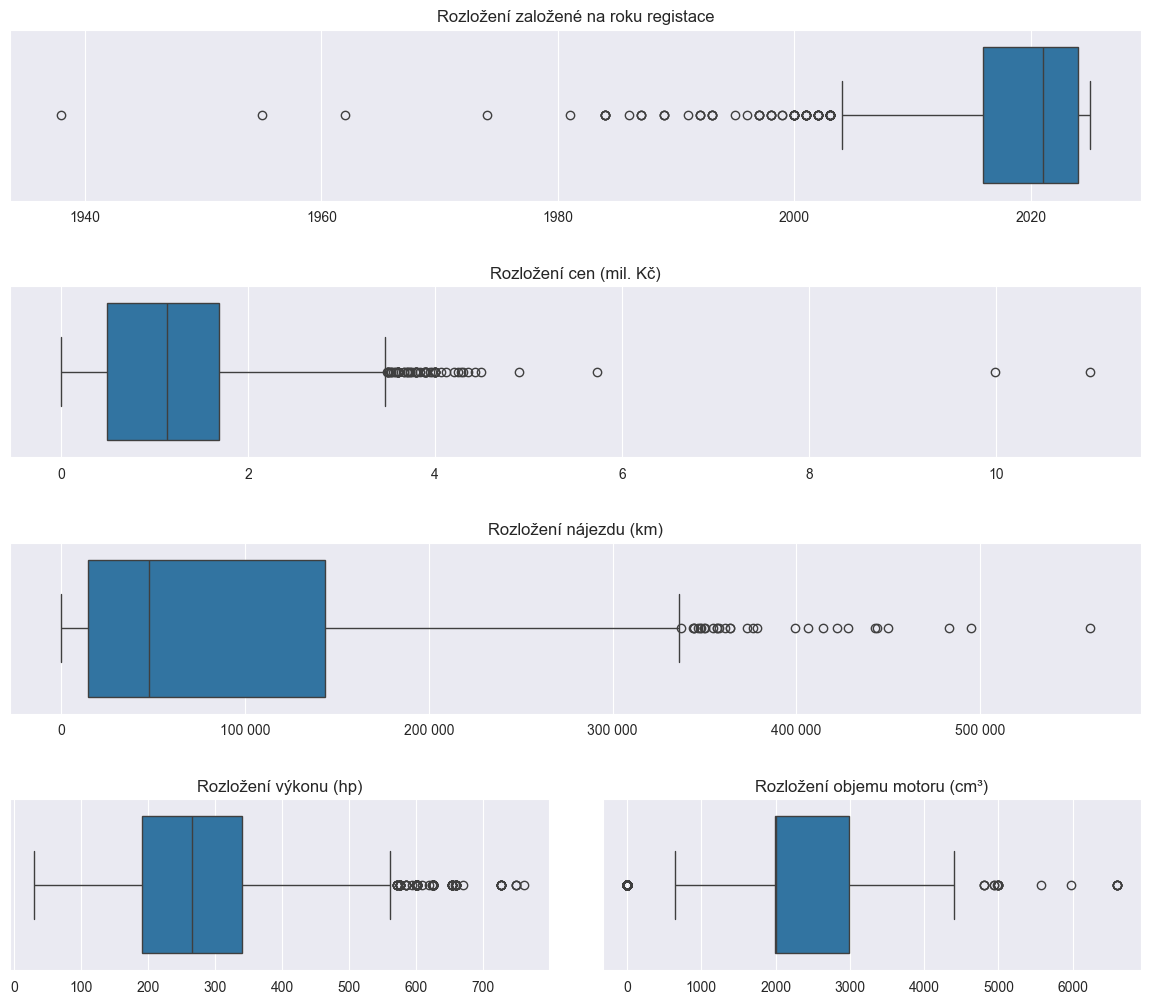

In [84]:
#Rozlozeni numerickych atributu pomoci krabicovych grafu
num_fig = plt.figure(figsize=(12, 10))

#Vytvoreni podgrafu
gs = gridspec.GridSpec(4, 2, figure=num_fig)

# Prvni 3 grafy pod sebou
ax1_num = num_fig.add_subplot(gs[0, :])
ax2_num = num_fig.add_subplot(gs[1, :])
ax3_num = num_fig.add_subplot(gs[2, :])

# Dva grafy vedle sebe
ax4_num = num_fig.add_subplot(gs[3, 0])
ax5_num = num_fig.add_subplot(gs[3, 1])

plt.tight_layout()
num_fig.subplots_adjust(hspace=0.5)

sns.boxplot(x="rok", data=df, ax=ax1_num)
sns.boxplot(x= df["cena"] / 1000000, data=df, ax=ax2_num) #Rozlozeni atributu cena v milionech
sns.boxplot(x="najezd", data=df, ax=ax3_num)
sns.boxplot(x="vykon", data=df, ax=ax4_num)
sns.boxplot(x="objem_motoru", data=df, ax=ax5_num)

#Uprava stylu
ax1_num.set_xlabel("")
ax2_num.set_xlabel("")
ax3_num.set_xlabel("")
ax4_num.set_xlabel("")
ax5_num.set_xlabel("")

ax1_num.set_title("Rozložení založené na roku registace")
ax2_num.set_title("Rozložení cen (mil. Kč)")
ax3_num.set_title("Rozložení nájezdu (km)")
ax4_num.set_title("Rozložení výkonu (hp)")
ax5_num.set_title("Rozložení objemu motoru (cm³)")

#Uprava formatovani osy x u ax3_num
formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))
ax3_num.xaxis.set_major_formatter(formatter)

#Ulozeni grafu do souboru
plt.savefig("../figures/2_exploratory_data_analysis/distribution_boxplots.png")

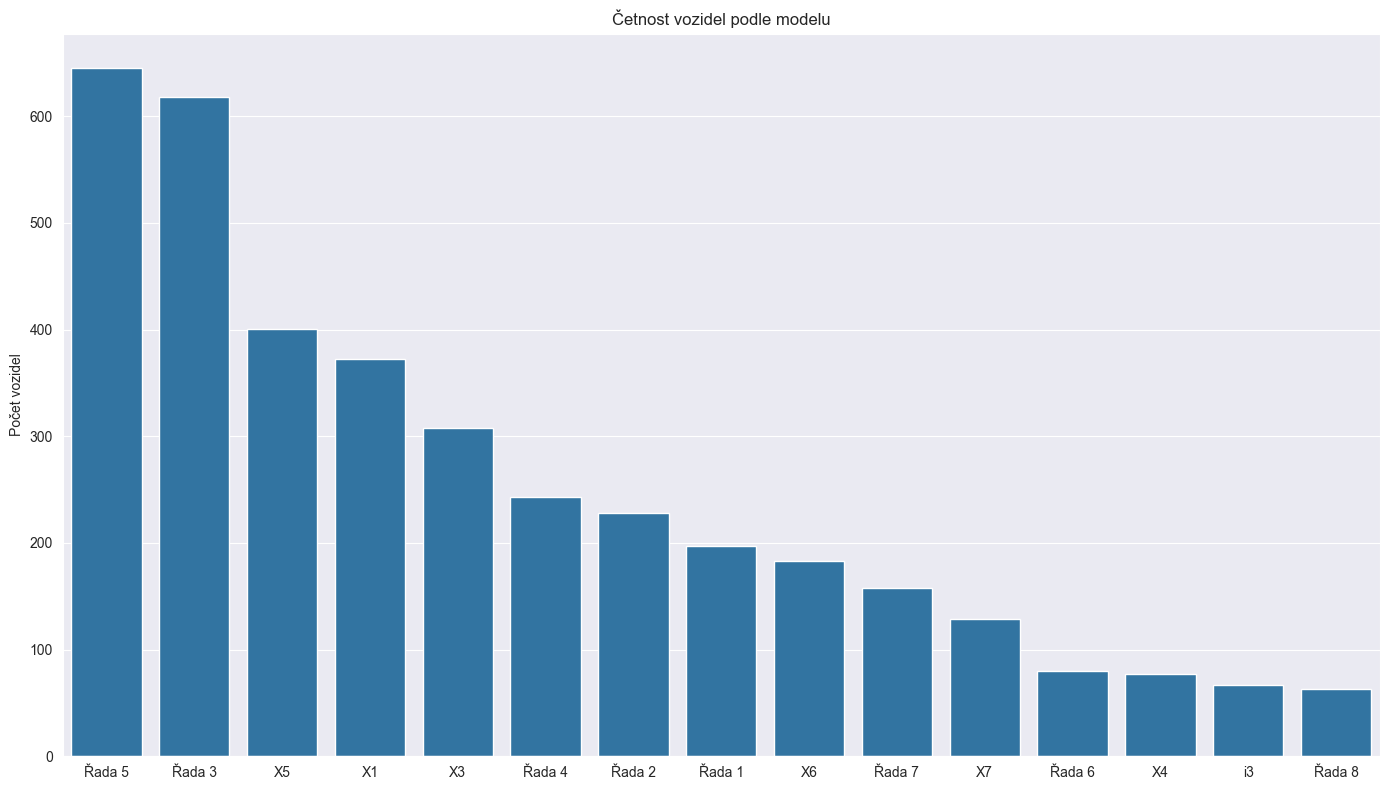

In [85]:
#Cetnost jednotlivych modelu vozidel

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(data=df, x="model_auta", ax=ax, order=df["model_auta"].value_counts().head(15).index)
ax.set_title("Četnost vozidel podle modelu")
ax.set_xlabel("")
ax.set_ylabel("Počet vozidel")
plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/countplot_model.png")

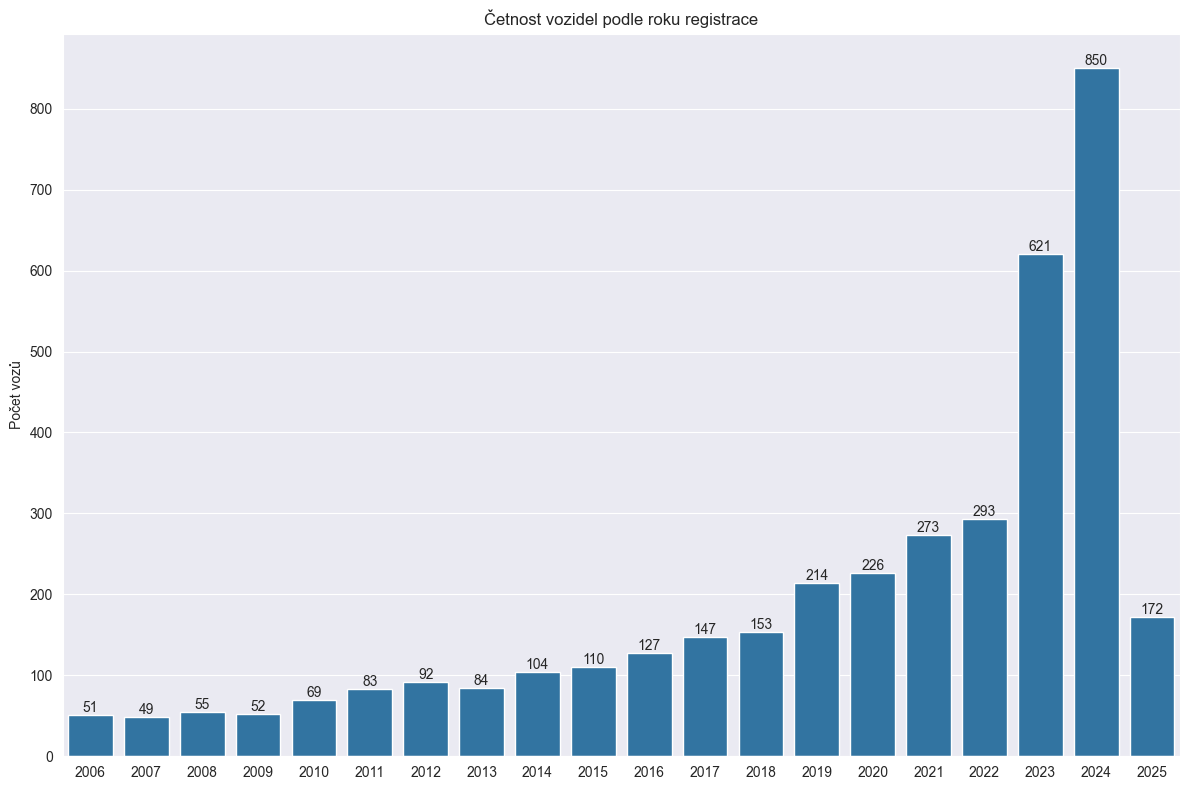

In [86]:
vyber_let = df[df["rok"] >= 2006]
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=vyber_let, x="rok", ax=ax)
ax.set_title("Četnost vozidel podle roku registrace")
ax.set_xlabel("")
ax.set_ylabel("Počet vozů")
ax.bar_label(ax.containers[0])
plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/countplot_year.png")

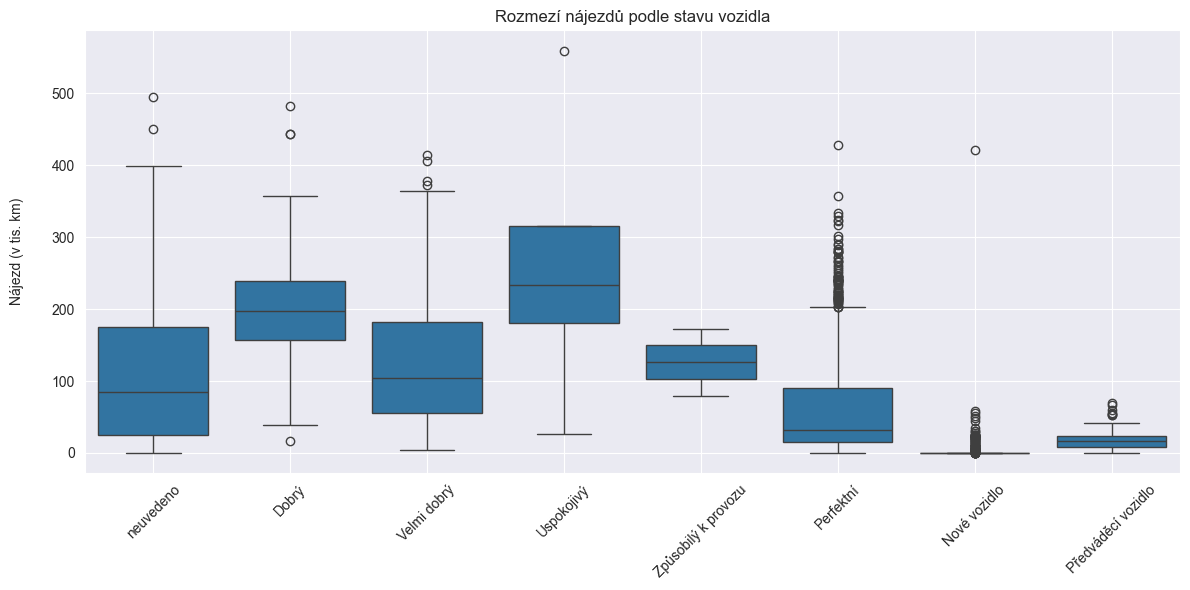

In [87]:
#Najezd podle stavu
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="stav", y= (df["najezd"] / 1000))
plt.title("Rozmezí nájezdů podle stavu vozidla")
plt.ylabel("Nájezd (v tis. km)", labelpad=20)
plt.xticks(rotation=45)
plt.xlabel("")
plt.grid(True)
plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/boxplot_stav.png")

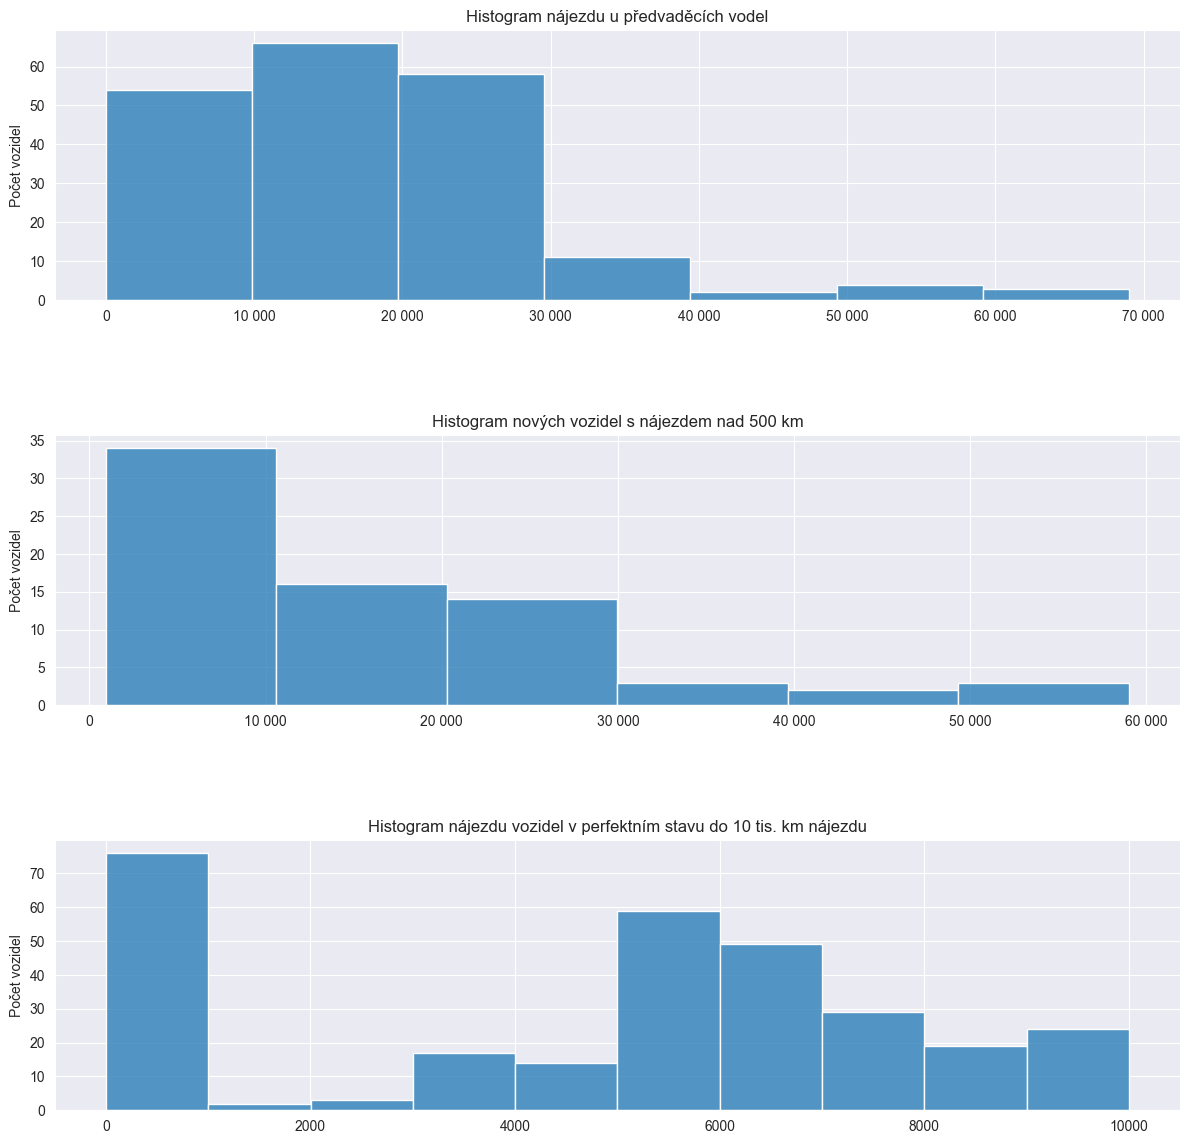

In [88]:
#Rozlozeni numerickych atributu pomoci krabicovych grafu
stav_fig = plt.figure(figsize=(12,12))

#Vytvoreni podgrafu
ax1_stav = stav_fig.add_subplot(3, 1, 1)
ax2_stav = stav_fig.add_subplot(3, 1, 2)
ax3_stav = stav_fig.add_subplot(3, 1, 3)

sns.histplot(data=df[(df["stav"] == "Předváděcí vozidlo")], x="najezd", ax=ax1_stav, bins=7)
sns.histplot(data=df[(df["stav"] == "Nové vozidlo") & (df["najezd"] >= 500) & (df["najezd"] <= 200000)], x="najezd", ax=ax2_stav, bins=6)
sns.histplot(data=df[(df["stav"] == "Perfektní") & (df["najezd"] <= 10000)], x="najezd", ax=ax3_stav, bins=10)

plt.tight_layout()
stav_fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(top=0.95, bottom=0.05)


#Uprava stylu
ax1_stav.set_xlabel("")
ax2_stav.set_xlabel("")
ax3_stav.set_xlabel("")
ax1_stav.set_ylabel("Počet vozidel")
ax2_stav.set_ylabel("Počet vozidel")
ax3_stav.set_ylabel("Počet vozidel")
ax1_stav.set_title("Histogram nájezdu u předvaděcích vodel")
ax2_stav.set_title("Histogram nových vozidel s nájezdem nad 500 km")
ax3_stav.set_title("Histogram nájezdu vozidel v perfektním stavu do 10 tis. km nájezdu")

#Uprava formatovani os x
#formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " ")) #odkomentovat pokud se smaze v bunce 3
ax1_stav.xaxis.set_major_formatter(formatter)
ax2_stav.xaxis.set_major_formatter(formatter)

plt.savefig("../figures/2_exploratory_data_analysis/histograms_stav.png")

                  cena       rok    najezd     vykon  objem_motoru  metaliza  \
cena          1.000000  0.829422 -0.791451  0.660109      0.292923  0.148796   
rok           0.829422  1.000000 -0.899221  0.295336     -0.040108  0.080797   
najezd       -0.791451 -0.899221  1.000000 -0.273636      0.073567 -0.069368   
vykon         0.660109  0.295336 -0.273636  1.000000      0.630614  0.150260   
objem_motoru  0.292923 -0.040108  0.073567  0.630614      1.000000  0.088743   
metaliza      0.148796  0.080797 -0.069368  0.150260      0.088743  1.000000   
je_manual    -0.461846 -0.445043  0.377431 -0.369932     -0.167580 -0.073897   
suv           0.232175  0.180720 -0.146747  0.095777      0.088748  0.034508   
nove          0.307066  0.453910 -0.506775  0.051338     -0.081148  0.054952   
predvadeci    0.190593  0.182234 -0.174726  0.106719      0.023570 -0.007663   
je_nafta     -0.159464 -0.110125  0.230614 -0.297253     -0.006837  0.017878   
je_benzin     0.004684 -0.048361 -0.0533

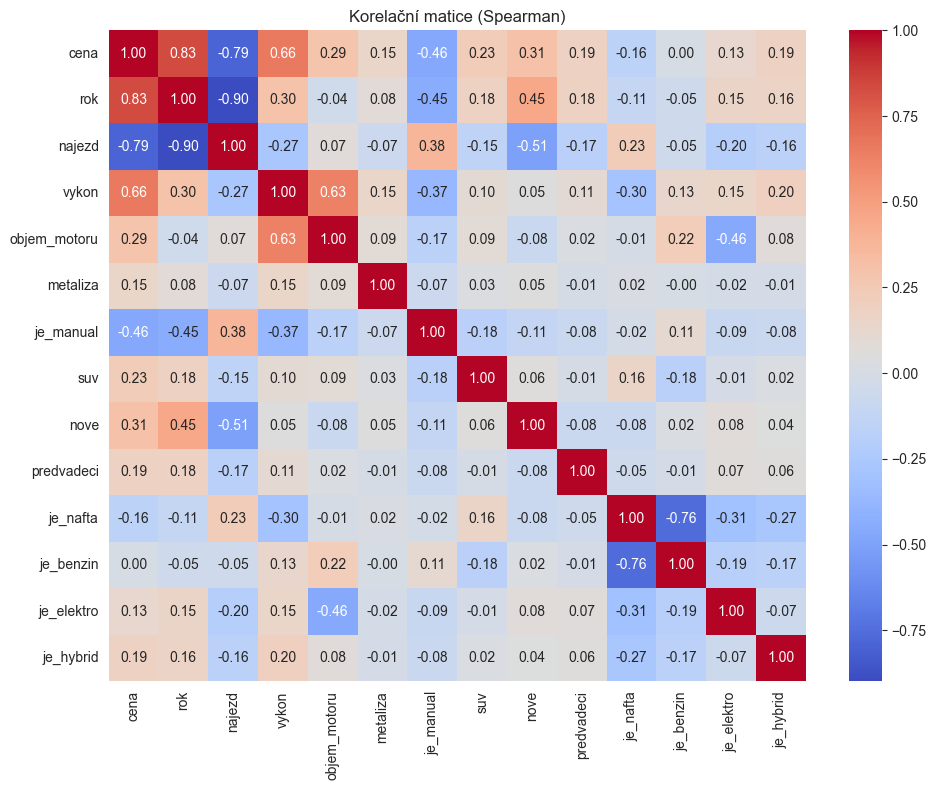

In [89]:
#Korelacni analyza
df_corr = df.copy()

#Binarizace potrebnych sloupcu
df_corr["je_manual"] = (df_corr["typ_prevodovky"] == "manuální převodovka").astype(int)
df_corr["suv"] = (df_corr["typ_karoserie"] == "SUV").astype(int)
df_corr["nove"] = (df_corr["stav"] == "Nové vozidlo").astype(int)
df_corr["predvadeci"] = (df_corr["stav"] == "Předváděcí vozidlo").astype(int)
df_corr["je_nafta"] = (df_corr["typ_paliva"] == "nafta").astype(int)
df_corr["je_benzin"] = (df_corr["typ_paliva"] == "benzin").astype(int)
df_corr["je_elektro"] = (df_corr["typ_paliva"] == "elektro").astype(int)
df_corr["je_hybrid"] = (df_corr["typ_paliva"] == "hybridní - benzin").astype(int)
df_corr["metaliza"] = df_corr["metaliza"].fillna(0).astype(int)

df_corr = df_corr.select_dtypes(include='number')

corr_matrix = df_corr.corr(method='spearman')
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelační matice (Spearman)')

plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/korelacni_analyza.png")

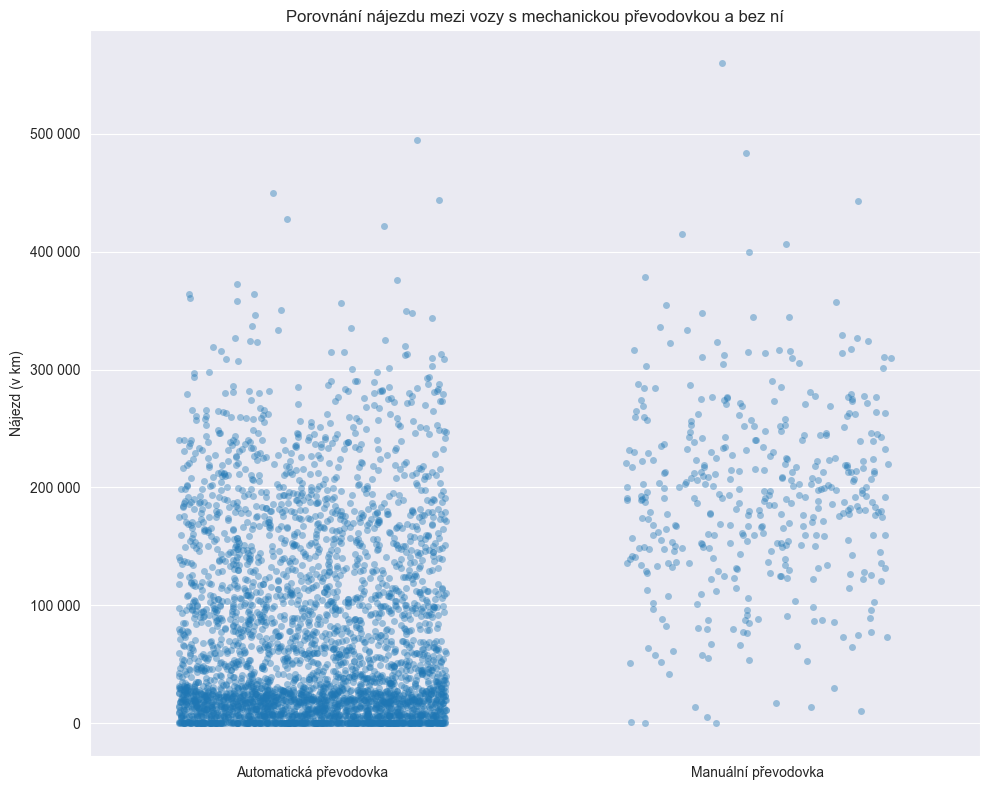

In [90]:
# Tady budou scatterplot nejzajímavějších korelací
fig, ax = plt.subplots(figsize=(10, 8))

sns.stripplot(data=df_corr, x="je_manual", y="najezd", jitter=0.3, alpha=0.4, ax=ax)

# Uprava stylu
ax.set_title("Porovnání nájezdu mezi vozy s mechanickou převodovkou a bez ní")
ax.set_xticks([0,1])
ax.set_xticklabels(["Automatická převodovka", "Manuální převodovka"])
ax.set_xlabel("")
ax.set_ylabel("Nájezd (v km)")
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/stripplot_manual.png")  # Ulozeni

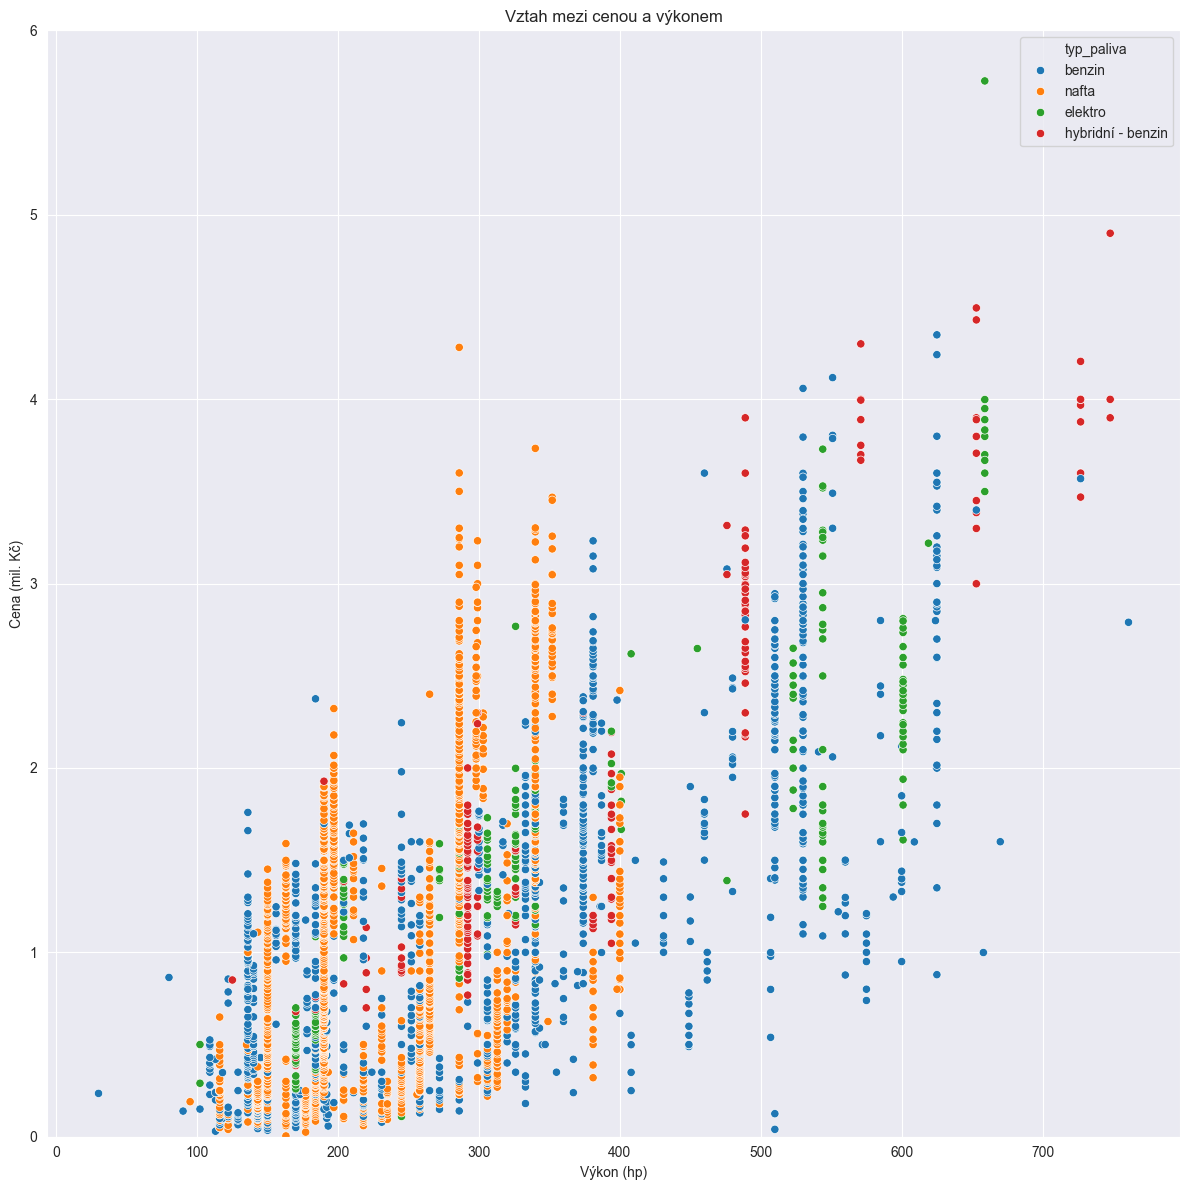

In [91]:
#Vztah mezi cenou a vykonem
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=df, x="vykon", y=(df["cena"]/1000000), hue="typ_paliva", ax=ax)
plt.ylim(0, 6) # Omezeni osy y na 6 milionu
ax.set_title("Vztah mezi cenou a výkonem")
ax.set_xlabel("Výkon (hp)")
ax.set_ylabel("Cena (mil. Kč)")

plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/scatterplot_cena_vykon.png")  # Ulozeni

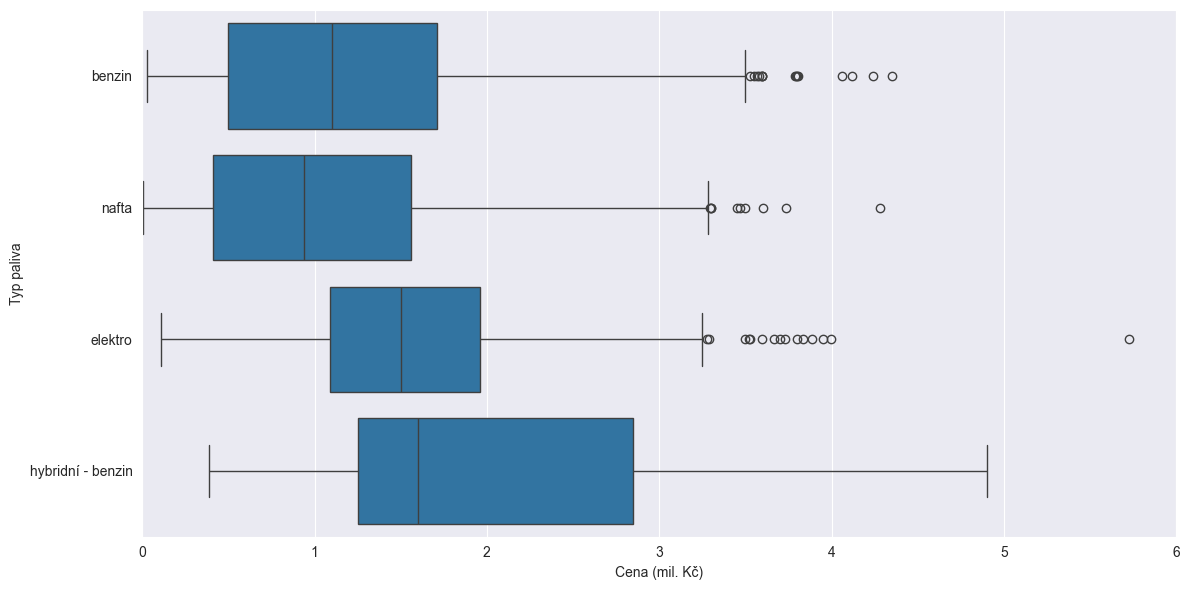

In [92]:
#Rozlozeni cen podle typu paliva
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y="typ_paliva", x=(df["cena"]/1000000))
plt.xlim(0, 6) # Cena omezena na 6 milionu
plt.xlabel("Cena (mil. Kč)")
plt.ylabel("Typ paliva")
plt.tight_layout()


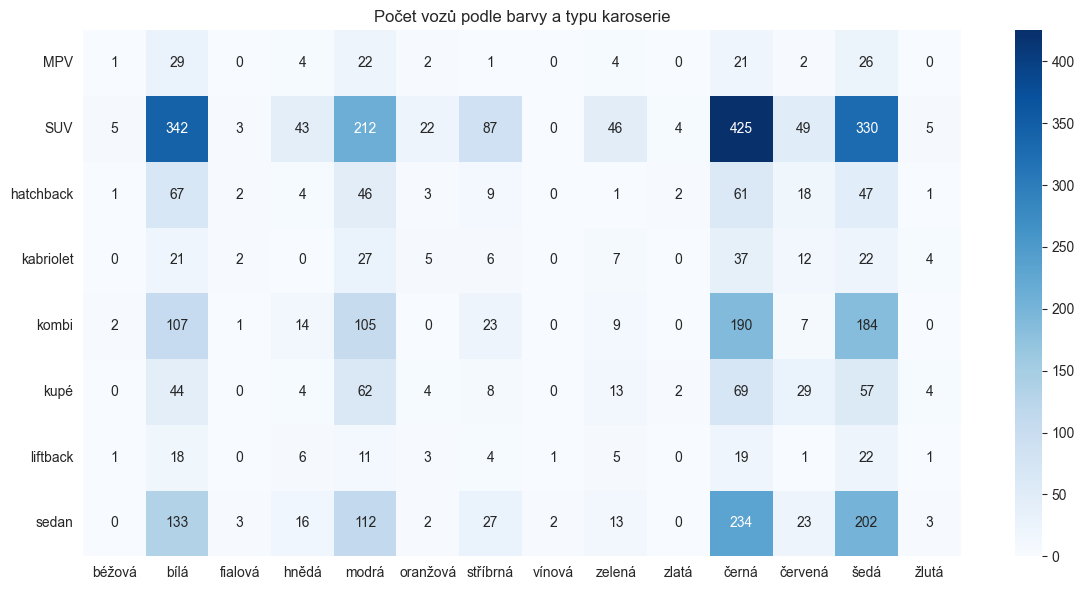

In [93]:
nejbarvy = (
    df.groupby(["typ_karoserie", "barva_exterieru"])
    .size()
    .reset_index(name="pocet")
)
pivot = nejbarvy.pivot(index="typ_karoserie", columns="barva_exterieru", values="pocet").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Počet vozů podle barvy a typu karoserie")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()

plt.tight_layout()

plt.savefig("../figures/2_exploratory_data_analysis/heatmap_barva_karoserie.png")  # Ulozeni

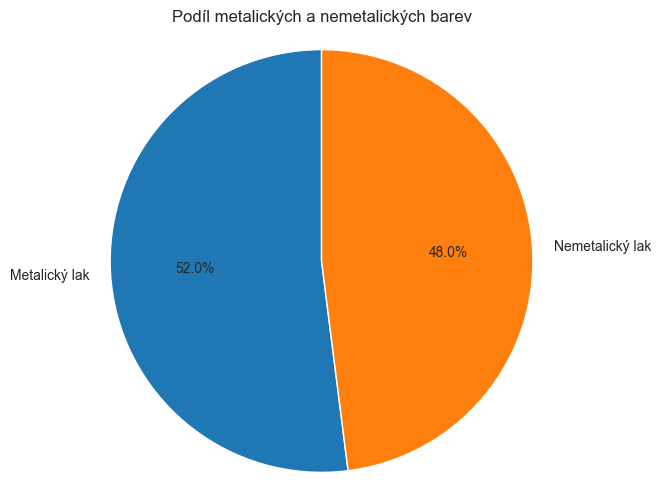

In [94]:
#Auta s metalízou vs bez
metaliza_counts = df["metaliza"].value_counts()
labels = ["Metalický lak", "Nemetalický lak"]

color_fig = plt.figure(figsize=(6, 6))

plt.pie(metaliza_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Podíl metalických a nemetalických barev")
plt.axis("equal")

plt.savefig("../figures/2_exploratory_data_analysis/pie_metaliza.png")  # Ulozeni

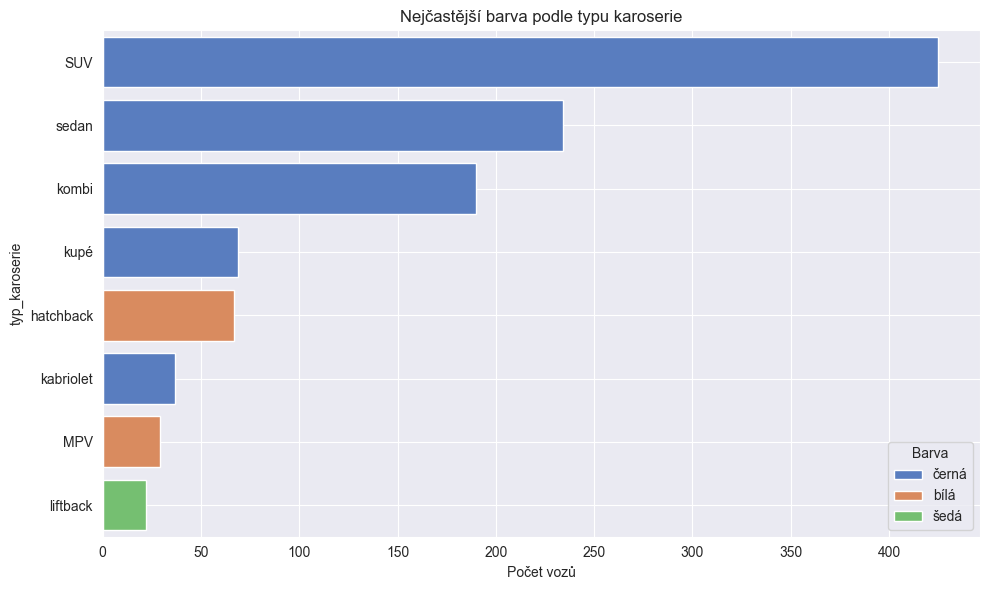

In [95]:
top_barvy = nejbarvy.sort_values('pocet', ascending=False).drop_duplicates('typ_karoserie')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_barvy,
    y='typ_karoserie',
    x='pocet',
    hue='barva_exterieru',
    dodge=False,
    palette='muted'
)

plt.title('Nejčastější barva podle typu karoserie')
plt.xlabel('Počet vozů')
plt.ylabel('typ_karoserie')
plt.legend(title='Barva')
plt.grid(True)
plt.tight_layout()
plt.show()